## Transient Energy transport

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
#from clim680_function import xyticks
import pymannkendall as mk

In [3]:
f='/project/xprecip/merra2_ncfiles/winds/vwinds_preslevs_4-23/850/high_pass/850winds_highpass_0.75deg.nc'
DS=xr.open_dataset(f)
hp_850winds=DS['__xarray_dataarray_variable__']
hp_850winds

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
[60709900 values with dtype=float64]
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [9]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
#hp_850winds['time'].values

In [4]:
f='/project/xprecip/merra2_ncfiles/temp_pressurelevels/850/high_pass/850tempconus_hp_regrid_0.75.nc'
DS=xr.open_dataset(f)
hp_850temp=DS['__xarray_dataarray_variable__']
hp_850temp

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 ...
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
    cutoffs       int64 ...
    coefficients  float64 ...

In [5]:
temp_same=hp_850temp.sel(time=slice(hp_850winds['time'][0],hp_850winds['time'][-1]))
temp_same

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 850.0
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
    cutoffs       int64 10
    coefficients  float64 -15.0

In [6]:
vt_prime850=temp_same*hp_850winds
vt_prime850

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
array([[[-1.66085959e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.84253270e-01, -1.80893786e-01, -7.42754655e-01, ...,
          5.21062673e-01,  7.96746521e-01,  7.18415196e-01],
        [ 1.03637198e+00,  8.69155119e-01,  5.10745812e-01, ...,
         -2.58686129e-01, -2.11182561e-01, -2.48875891e-01],
        ...,
        [            nan,             nan,  7.05836378e-02, ...,
          6.45022696e+00,  9.88443374e+00,  1.03609804e+01],
        [ 1.59654976e-01, -2.02638033e-02,  9.57950534e-02, ...,
          3.85915223e+00,  6.58674777e+00,  8.29372252e+00],
        [ 7.47807504e-03, -4.30315272e-01, -9.34086912e-01, ...,
          3.09170466e+00,  5.85069201e+00,  8.28012173e+00]],

       [[ 5.52144781e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.16030562e+00,  1.82631903e-01,  7.85473542e-01, ...,
          1.40427644e+00,  1.42633969e+00,  1.26253717e+00],
        [-1.97747160e+00, -1.51995885e+00, -8.26665209e-01, ...,
          1.44697588e+00,  1.61744425e+00,  1.54505500e+00],
...
        [            nan, -1.19910708e-01, -2.12489972e-01, ...,
          1.78424295e+02,  2.23554128e+02,  2.55394023e+02],
        [ 2.52979010e-01,  2.63847820e+00,  3.96520375e+00, ...,
          1.64155748e+02,  1.86962295e+02,  1.98718087e+02],
        [-2.16216176e+00, -4.18945068e-01,  2.92661181e+00, ...,
          5.20266453e+01,  6.31884907e+01,  7.30070111e+01]],

       [[ 9.97131680e-03,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.72290150e+00, -1.58202182e+00, -1.16965797e+00, ...,
          3.02944227e-02,  3.98135728e-02, -2.59957126e-01],
        [-2.39680896e+00, -3.13172715e+00, -2.50150942e+00, ...,
         -2.41443298e-01,  5.17472676e-01,  8.95846392e-01],
        ...,
        [            nan,  5.96587011e+00,  9.24634068e+00, ...,
          2.51172075e+01,  3.82876610e+01,  5.61733180e+01],
        [ 6.52093420e-01,  1.03891146e+00,  2.24251652e+00, ...,
         -3.26210412e+00,  7.71354969e+00,  2.31814930e+01],
        [-1.10876781e+00, -1.36512742e+00, -3.17337596e+00, ...,
         -2.35130519e+00,  4.26196585e-01,  5.22478762e+00]]])
Coordinates:
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [7]:
sh_transients850=vt_prime850*1004
sh_transients850

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
array([[[-1.66750303e+03,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.85390283e+02, -1.81617361e+02, -7.45725674e+02, ...,
          5.23146924e+02,  7.99933507e+02,  7.21288857e+02],
        [ 1.04051747e+03,  8.72631739e+02,  5.12788795e+02, ...,
         -2.59720873e+02, -2.12027292e+02, -2.49871395e+02],
        ...,
        [            nan,             nan,  7.08659723e+01, ...,
          6.47602787e+03,  9.92397148e+03,  1.04024244e+04],
        [ 1.60293596e+02, -2.03448585e+01,  9.61782336e+01, ...,
          3.87458884e+03,  6.61309476e+03,  8.32689741e+03],
        [ 7.50798734e+00, -4.32036534e+02, -9.37823259e+02, ...,
          3.10407148e+03,  5.87409478e+03,  8.31324222e+03]],

       [[ 5.54353360e+03,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.16494684e+03,  1.83362431e+02,  7.88615437e+02, ...,
          1.40989355e+03,  1.43204504e+03,  1.26758732e+03],
        [-1.98538149e+03, -1.52603869e+03, -8.29971870e+02, ...,
          1.45276378e+03,  1.62391403e+03,  1.55123522e+03],
...
        [            nan, -1.20390351e+02, -2.13339932e+02, ...,
          1.79137992e+05,  2.24448344e+05,  2.56415599e+05],
        [ 2.53990926e+02,  2.64903211e+03,  3.98106456e+03, ...,
          1.64812371e+05,  1.87710144e+05,  1.99512959e+05],
        [-2.17081040e+03, -4.20620848e+02,  2.93831826e+03, ...,
          5.22347519e+04,  6.34412447e+04,  7.32990392e+04]],

       [[ 1.00112021e+01,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.72979311e+03, -1.58834991e+03, -1.17433660e+03, ...,
          3.04156004e+01,  3.99728271e+01, -2.60996954e+02],
        [-2.40639620e+03, -3.14425406e+03, -2.51151546e+03, ...,
         -2.42409071e+02,  5.19542567e+02,  8.99429777e+02],
        ...,
        [            nan,  5.98973359e+03,  9.28332604e+03, ...,
          2.52176764e+04,  3.84408116e+04,  5.63980113e+04],
        [ 6.54701793e+02,  1.04306711e+03,  2.25148658e+03, ...,
         -3.27515254e+03,  7.74440389e+03,  2.32742190e+04],
        [-1.11320288e+03, -1.37058793e+03, -3.18606947e+03, ...,
         -2.36071041e+03,  4.27901371e+02,  5.24568677e+03]]])
Coordinates:
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [8]:
shtransientsclimo850=sh_transients850.mean(dim='time')
shtransientsclimo850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[  34.41742525,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  44.65353889,   51.50540422,   53.17991566, ...,   84.43566721,
          84.56399593,   83.08424119],
       [  72.36553803,   82.72230521,   84.39803191, ...,   96.38323087,
          97.71210633,   99.98802943],
       ...,
       [2437.89970962, 2412.80601272, 2896.93519067, ..., 7655.5740022 ,
        7797.23461973, 7851.54442857],
       [3303.45019668, 3595.20605919, 3673.22338241, ..., 6503.21311826,
        6553.53290387, 6575.38217877],
       [2986.60404449, 3135.91717743, 2999.1089681 , ..., 5279.06679935,
        5314.45854357, 5376.8718604 ]])
Coordinates:
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [15]:
shtransientsclimo850.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/shtransients_climo850.nc')

In [10]:
temp_early=temp_same.sel(time=slice('1980-12-01','2001-02-28'))
temp_late=temp_same.sel(time=slice('2001-12-01','2022-02-28'))
vclimo_early=hp_850winds.sel(time=slice('1980-12-01','2001-02-28'))
vclimo_late=hp_850winds.sel(time=slice('2001-12-01','2022-02-28'))

In [11]:
sh_early=(temp_early*vclimo_early*1004).mean(dim='time')
sh_late=(temp_late*vclimo_late*1004).mean(dim='time')
sh_diff=sh_late-sh_early
sh_diff

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[    9.92313477,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [   36.91411854,    23.57573123,    33.80304645, ...,
          -25.48123265,   -30.21544071,   -32.97014511],
       [   80.1971538 ,    68.58618899,    75.69065637, ...,
          -37.65923697,   -34.98945554,   -41.52557249],
       ...,
       [ 1318.35978734,  1317.81661751,   857.98032665, ...,
         -491.71745114,  -570.1251707 ,  -652.32988399],
       [  621.70079282,   671.55154429,   635.27803824, ...,
         -766.23978558,  -789.92697516,  -743.1705755 ],
       [  511.83579209,   582.07568774,   537.66940752, ...,
        -1000.43174675,  -943.52658319,  -835.13717411]])
Coordinates:
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
    lev           float64 850.0
    cutoffs       int64 10
    coefficients  float64 -15.0

In [12]:
sh_early.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_transients_early850.nc')
sh_late.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_transients_late850.nc')

In [13]:
sh_diff.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_diff_transients850.nc')

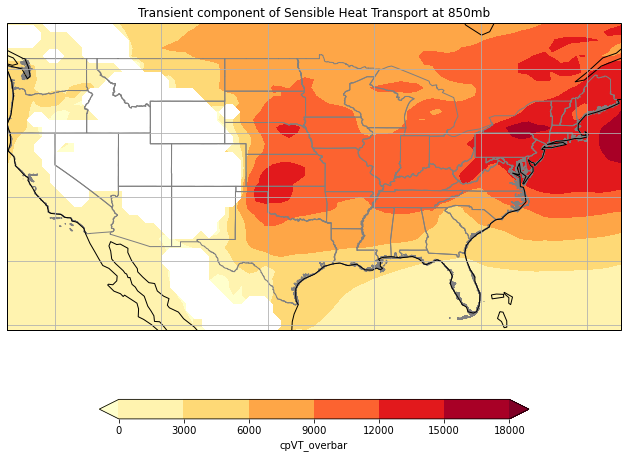

In [21]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=shtransientsclimo850[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
#max_val=1600000
#increment=200000
#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(data['lon'], data['lat'], data,
            transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='cpVT_overbar')

# Add title
plt.title('Transient component of Sensible Heat Transport at 850mb')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/shtransients_conusclimo_merra.png')

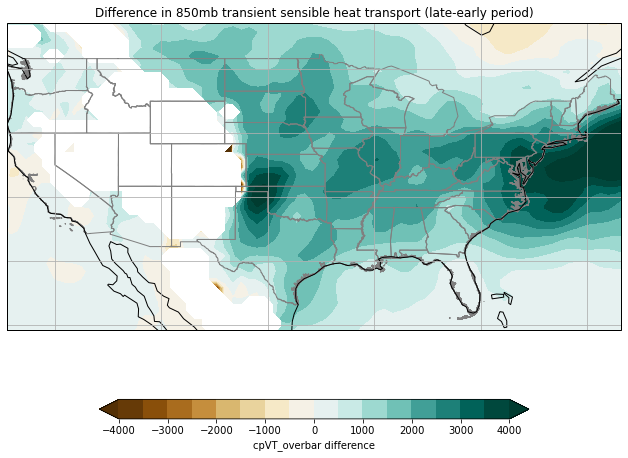

In [23]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=sh_diff[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
max_val=4000
increment=500
clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(sh_diff['lon'], sh_diff['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='cpVT_overbar difference')

# Add title
plt.title('Difference in 850mb transient sensible heat transport (late-early period)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/shtransient_conusclimo_merra_difference.png')

### Moisture

In [14]:
f='/project/xprecip/merra2_ncfiles/spec_hum/spec_hum_preslev/high_pass/hpfilter_spechum_0.75.nc'
DS=xr.open_dataset(f)
spechum=DS['__xarray_dataarray_variable__']
spechum

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lev: 2, lat: 47, lon: 100)>
[129099600 values with dtype=float64]
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
  * lev           (lev) float64 850.0 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [15]:
spechum850=spechum.sel(lev=850)
spechum300=spechum.sel(lev=300)
spechum850

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [16]:
spechum_same=spechum850.sel(time=slice(hp_850winds['time'][0],hp_850winds['time'][-1]))
spechum_same

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [17]:
lh_prime850=spechum_same*hp_850winds*2260000
lh_prime850

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
array([[[ 3.08766933e+03,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.08001739e+02,  2.07403065e+02,  1.09897443e+03, ...,
          6.09015113e+03,  5.81609477e+03,  6.43505405e+03],
        [-2.16328114e+02, -4.35991198e+02, -3.33669094e+02, ...,
          3.02829564e+03,  2.83860728e+03,  3.04833451e+03],
        ...,
        [            nan,             nan, -6.19509758e+01, ...,
          1.29523000e+04,  1.52193143e+04,  1.56243379e+04],
        [-1.40913540e+01,  1.99573959e+01,  1.12997557e+02, ...,
          1.01249895e+04,  1.29744680e+04,  1.52712670e+04],
        [-8.91565524e-01,  7.61102719e+01,  1.51134559e+02, ...,
          8.71691696e+03,  1.19976942e+04,  1.48821312e+04]],

       [[-2.65995033e+04,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.42621195e+03,  2.13527164e+03,  1.61778167e+03, ...,
          2.02365099e+03,  2.17774570e+03,  1.45074051e+03],
        [ 1.15409337e+03,  2.45121129e+03,  2.50638610e+03, ...,
         -1.36654132e+03, -9.62960971e+02, -2.12119136e+02],
...
        [            nan, -2.49734641e+03, -4.05831708e+03, ...,
          8.02561937e+04,  1.05643427e+05,  1.19545440e+05],
        [-5.17761814e+03, -4.69986983e+03, -4.05155964e+03, ...,
          6.56913549e+04,  7.34861739e+04,  7.56268161e+04],
        [-5.48586000e+03, -5.29715130e+03, -3.54346836e+03, ...,
          1.70341054e+04,  2.03891454e+04,  2.16574502e+04]],

       [[-8.05695826e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.31032393e+03,  2.13320311e+03,  1.28423793e+03, ...,
         -1.41890509e+02,  1.67508727e+03,  8.03259881e+03],
        [ 3.62398729e+03,  4.04599932e+03,  3.10543949e+03, ...,
          1.17395099e+03,  1.72099276e+02,  8.73608001e+03],
        ...,
        [            nan, -4.38593183e+03, -3.26549044e+03, ...,
          3.80399205e+03,  4.51572602e+03,  4.87325574e+03],
        [-1.50921320e+03, -1.75034625e+03, -1.96915668e+03, ...,
         -1.23939554e+03,  2.66092653e+03,  8.07063224e+03],
        [-8.53424745e+02, -1.28781519e+03, -1.78470689e+03, ...,
         -1.07280109e+03,  1.85809213e+02,  2.18290444e+03]]])
Coordinates:
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [30]:
lhtransientsclimo850=lh_prime850.mean(dim='time')
lhtransientsclimo850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 3.41888858e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.37289487e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.71329921e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.05991806e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.80903465e+02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.82072414e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                    nan,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,             nan,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.06115187e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.60416809e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -9.70246476e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.30847975e+02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
...
         9.14245452e+02,  9.21625621e+02,  9.40604800e+02,
         9.65575193e+02,  9.81748787e+02,  9.95041934e+02,
         1.01965452e+03,  1.05034913e+03,  1.08232302e+03,
         1.10970129e+03,  1.12421625e+03,  1.12211861e+03,
         1.12537608e+03,  1.13814367e+03,  1.12951434e+03,
         1.09249135e+03,  1.04815166e+03,  1.03450773e+03,
         1.05023119e+03,  1.07933000e+03,  1.12423022e+03,
         1.15399073e+03,  1.16036485e+03,  1.13315860e+03,
         1.13272302e+03,  1.16472116e+03,  1.20523852e+03,
         1.26491313e+03,  1.32654778e+03,  1.39451812e+03,
         1.47066083e+03,  1.50316751e+03,  1.52097754e+03,
         1.54117296e+03,  1.54550689e+03,  1.54145270e+03,
         1.54825919e+03,  1.56565090e+03,  1.55945643e+03,
         1.52435182e+03,  1.44420424e+03,  1.35208405e+03,
         1.28227525e+03,  1.27399583e+03,  1.31552886e+03,
         1.30422912e+03,  1.25568326e+03,  1.27326922e+03,
         1.31821532e+03,  1.40739089e+03,  1.51543090e+03,
         1.66223957e+03,  1.83907506e+03,  2.01437671e+03,
         2.16299537e+03,  2.30917168e+03,  2.45544497e+03,
         2.63411971e+03]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


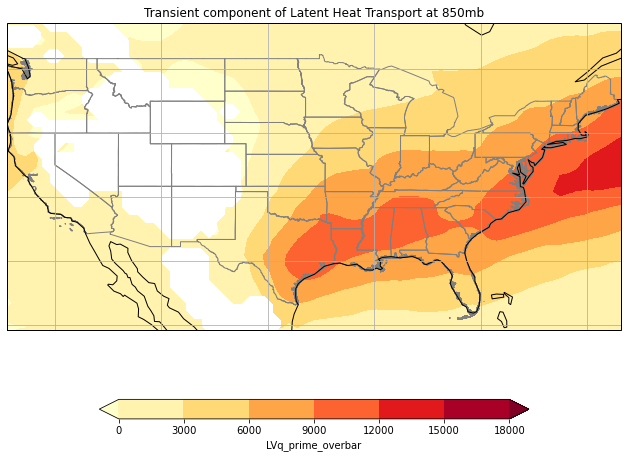

In [31]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=lhtransientsclimo850[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
#max_val=1600000
#increment=200000
#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(data['lon'], data['lat'], data,
            transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='LVq_prime_overbar')

# Add title
plt.title('Transient component of Latent Heat Transport at 850mb')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/lhtransients_conusclimo_merra.png')

In [32]:
lhtransientsclimo850.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/lhtransients_climo850.nc')

In [18]:
moisture_early=spechum_same.sel(time=slice('1980-12-01','2001-02-28'))
moisture_late=spechum_same.sel(time=slice('2001-12-01','2022-02-28'))

In [19]:
lh_early=(moisture_early*vclimo_early*2260000).mean(dim='time')
lh_late=(moisture_late*vclimo_late*2260000).mean(dim='time')
lh_diff=lh_late-lh_early
lh_diff

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 176.62983933,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 225.08237773,  185.23948107,  120.32417726, ...,  217.09574519,
         247.38159736,  266.32234821],
       [  13.3020861 ,  100.04733946,  111.74028125, ...,  185.18399972,
         199.13949225,  272.22978142],
       ...,
       [ 412.47388066,  327.48264196,  113.83216105, ..., -279.14822136,
        -265.31342835, -164.47768756],
       [ 188.48601428,  185.10060569,  191.90397828, ..., -361.50460334,
        -337.22730516, -233.50573016],
       [ 284.70400405,  314.4324288 ,  306.03332056, ..., -479.57698378,
        -474.9206456 , -376.36815015]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 850.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [20]:
lh_early.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_early850.nc')
lh_late.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_late850.nc')

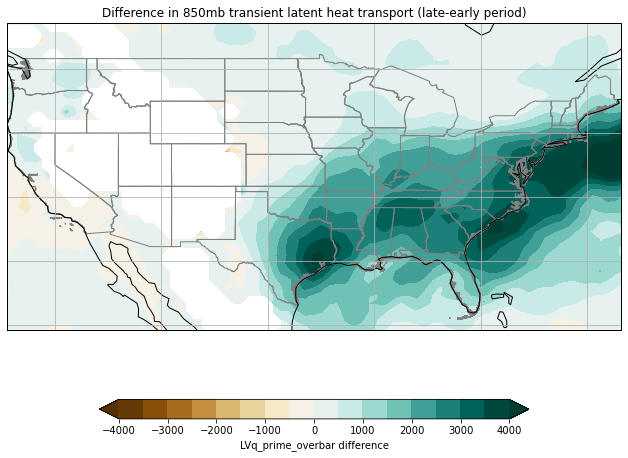

In [38]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=lh_diff[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
max_val=4000
increment=500
clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(lh_diff['lon'], lh_diff['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='LVq_prime_overbar difference')

# Add title
plt.title('Difference in 850mb transient latent heat transport (late-early period)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/lhtransient_conusclimo_merra_difference.png')

In [21]:
lh_diff.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_diff_transients850.nc')

In [22]:
f='/project/xprecip/merra2_ncfiles/temp_pressurelevels/300/high_pass/hpfilter_t300_0.75deg.nc'
DS=xr.open_dataset(f)
hp_300temp=DS['__xarray_dataarray_variable__']
hp_300temp

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
    lev           float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [23]:
f='/project/xprecip/merra2_ncfiles/winds/vwinds_preslevs_4-23/300/high_pass/hpfilter_vwind_0.75.nc'
DS=xr.open_dataset(f)
hp_300winds=DS['__xarray_dataarray_variable__']
hp_300winds

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
[60709900 values with dtype=float64]
Coordinates:
    cutoffs       int64 ...
    lev           float64 ...
    coefficients  float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [25]:
temp_early=hp_300temp.sel(time=slice('1980-12-01','2001-02-28'))
temp_late=hp_300temp.sel(time=slice('2001-12-01','2022-02-28'))
winds_early=hp_300winds.sel(time=slice('1980-12-01','2001-02-28'))
winds_late=hp_300winds.sel(time=slice('2001-12-01','2022-02-28'))

In [26]:
sh_transients_early=(temp_early*winds_early*1004).mean(dim='time')
sh_transients_late=(temp_late*winds_late*1004).mean(dim='time')
sh_diff=sh_transients_late-sh_transients_early

In [27]:
sh_transients_early.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_transients_early300.nc')
sh_transients_late.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/sh_transients_late300.nc')

In [24]:
sh_transients300=hp_300temp*hp_300winds*1004
sh_transients300

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
array([[[-6.28790397e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.90267861e+02,  6.24771819e+02,  7.19655609e+02, ...,
         -8.82799479e+01,  3.27112887e+01, -5.08284760e+00],
        [-8.64294400e+02, -2.57840725e+02,  3.67884655e+02, ...,
         -1.24248447e+02, -2.37581219e+02, -3.50005029e+02],
        ...,
        [ 4.09174902e+03,  5.31774378e+03,  6.19069433e+03, ...,
         -3.59931897e+02, -2.10767698e+02, -3.41798714e+02],
        [ 3.27459590e+03,  4.15425176e+03,  4.57725366e+03, ...,
          2.26533812e+02, -9.17705812e+01,  1.27037889e+01],
        [ 2.66541033e+03,  3.09759460e+03,  3.32021989e+03, ...,
          9.85082758e+02, -3.51792055e+01, -3.22078169e+02]],

       [[ 4.66882675e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.00582507e+03,  2.39138171e+03,  2.64634579e+03, ...,
         -3.15689675e+02, -1.04023373e+03, -1.42454206e+03],
        [ 1.50284285e+03,  2.18036520e+03,  4.00940771e+03, ...,
         -5.05018909e+02, -1.12786608e+03, -1.15088121e+03],
...
        [ 7.17358722e+03,  7.69753411e+03,  8.07041851e+03, ...,
          1.62954921e+04,  1.72374148e+04,  1.81031892e+04],
        [ 1.54445972e+04,  1.89883424e+04,  2.02765893e+04, ...,
          1.44202237e+04,  1.50725398e+04,  1.71696207e+04],
        [ 2.14180610e+04,  2.76594617e+04,  3.02933078e+04, ...,
          3.77205198e+03,  2.76180946e+03,  3.09574107e+03]],

       [[-3.41879734e+03,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-4.92763209e+02, -6.28961016e+02, -8.72254982e+02, ...,
         -6.09953671e+02, -5.34014827e+02, -5.73076452e+02],
        [ 6.67855559e+02,  7.18026866e+02,  1.75587682e+02, ...,
         -7.57789457e+02, -4.80318350e+02, -4.00308275e+02],
        ...,
        [-1.63960896e+04, -2.17302402e+04, -1.01314259e+04, ...,
         -3.85131861e+03,  3.65085191e+03,  7.23974559e+03],
        [-6.99629819e+03, -1.89346886e+04, -1.74078355e+04, ...,
          3.17217718e+03,  1.09614645e+04,  1.64051141e+04],
        [ 1.31434625e+03, -1.06439312e+04, -1.73522894e+04, ...,
          1.45471427e+04,  2.07893904e+04,  2.37007368e+04]]])
Coordinates:
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [7]:
shclimo300_transients=sh_transients300.mean(dim='time')
shclimo300_transients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[-753.46096275,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-720.46675587, -704.70994565, -680.92297929, ..., -207.60583498,
        -204.91931091, -228.34798251],
       [-665.7412923 , -654.71127611, -619.21347034, ..., -192.92588805,
        -199.9007207 , -222.14315188],
       ...,
       [-367.59042912, -471.25878808, -626.50032528, ..., 6377.65383941,
        6514.96016942, 6660.90181276],
       [-435.9336959 , -539.10302239, -691.305799  , ..., 5659.19036531,
        5797.53405739, 5930.48844996],
       [-350.87649923, -465.65069713, -665.26776532, ..., 4932.26094618,
        5059.09272222, 5161.56431751]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [9]:
shclimo300_transients.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/shtransients_climo300.nc')

In [8]:
v300_climo=hp_300winds.mean(dim='time')
v300_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[-0.0057248 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00638233, -0.00735323, -0.00688807, ...,  0.00795863,
         0.00594473,  0.00368436],
       [-0.00718644, -0.00692469, -0.00561473, ...,  0.00790732,
         0.00635887,  0.00440469],
       ...,
       [-0.00962439, -0.00428256,  0.0002626 , ..., -0.02418732,
        -0.02217451, -0.01835755],
       [-0.00664636, -0.00231346,  0.00126911, ..., -0.02121801,
        -0.01906579, -0.01563339],
       [-0.00288979,  0.00044918,  0.00304772, ..., -0.01845274,
        -0.01606257, -0.01289857]])
Coordinates:
    cutoffs       int64 10
    lev           float64 300.0
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [10]:
sh_transients_early=sh_transients300.sel(time=slice('1980-12-01','2001-02-20'))
#sh_total_early
sh_early_climo=sh_transients_early.mean(dim='time')
sh_early_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[-611.63856191,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-572.73631244, -610.55894518, -607.91476829, ..., -285.87970379,
        -286.14872373, -300.78978243],
       [-540.00915817, -569.55141774, -548.91388481, ..., -252.39733093,
        -259.15973168, -280.54536299],
       ...,
       [ 308.25264032,  222.09871557,   64.11732064, ..., 6350.26098194,
        6632.38324461, 6849.79021125],
       [ 310.28120186,  220.01096215,   55.53815073, ..., 5594.91247514,
        5859.65441971, 6072.48267031],
       [ 381.28739979,  304.53852037,  164.55063243, ..., 4921.03498244,
        5151.02440501, 5320.57248845]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [11]:
sh_transients_late=sh_transients300.sel(time=slice('2001-12-01','2022-02-20'))
#sh_total_late
sh_late_climo=sh_transients_late.mean(dim='time')
sh_late_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ -878.41007081,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [ -850.62099829,  -787.65934901,  -745.24505248, ...,
         -138.6445846 ,  -133.35415182,  -164.52493176],
       [ -776.51447002,  -729.73925676,  -681.14917624, ...,
         -140.53004862,  -147.69203912,  -170.68933256],
       ...,
       [ -963.02519978, -1082.12421652, -1234.95187003, ...,
         6401.78763695,  6411.50748194,  6494.48637503],
       [-1093.36782018, -1207.90156709, -1349.29413391, ...,
         5715.8208059 ,  5742.80445318,  5805.38796458],
       [ -995.93133963, -1144.20680109, -1396.35867931, ...,
         4942.15130306,  4978.09859364,  5021.47411303]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [12]:
sh_diff_300=sh_late_climo-sh_early_climo
sh_diff_300

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ -266.77150889,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [ -277.88468584,  -177.10040383,  -137.33028419, ...,
          147.2351192 ,   152.79457191,   136.26485066],
       [ -236.50531186,  -160.18783902,  -132.23529143, ...,
          111.86728231,   111.46769257,   109.85603043],
       ...,
       [-1271.2778401 , -1304.22293209, -1299.06919068, ...,
           51.52665501,  -220.87576267,  -355.30383621],
       [-1403.64902204, -1427.91252924, -1404.83228464, ...,
          120.90833076,  -116.84996652,  -267.09470573],
       [-1377.21873942, -1448.74532146, -1560.90931174, ...,
           21.11632062,  -172.92581137,  -299.09837541]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [13]:
sh_diff_300.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/shtransients_diff300.nc')

In [28]:
f='/project/xprecip/merra2_ncfiles/spec_hum/spec_hum_preslev/high_pass/hpfilter_spechum_0.75.nc'
DS=xr.open_dataset(f)
spechum=DS['__xarray_dataarray_variable__']
spechum

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lev: 2, lat: 47, lon: 100)>
[129099600 values with dtype=float64]
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
  * lev           (lev) float64 850.0 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [29]:
spechum300=spechum.sel(lev=300)
spechum300

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [30]:
lh_300_transients=spechum300*hp_300winds*2260000
lh_300_transients

<xarray.DataArray '__xarray_dataarray_variable__' (time: 12917, lat: 47, lon: 100)>
array([[[ 3.91656587e+01,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.80081044e+01, -4.30983961e+01, -5.21231051e+01, ...,
         -3.32613400e+02, -2.97865383e+02, -1.70925804e+01],
        [ 5.42821645e+01,  1.11391417e+02,  3.72056481e+01, ...,
         -2.59942009e+02, -4.00743767e+02, -2.61823064e+02],
        ...,
        [-7.09666787e+00, -1.14749828e+01,  3.84091049e-01, ...,
         -4.95379624e+01, -1.24265582e+02, -2.10487974e+02],
        [-6.74195135e+00, -8.36584357e+00,  6.87506528e+00, ...,
          3.07492414e+01, -6.70533842e+01, -1.59411868e+02],
        [-6.28085379e+00, -7.09935279e+00,  4.95377098e+00, ...,
          1.16322576e+02, -7.96790716e+00, -1.11786054e+02]],

       [[ 4.40857691e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.56664593e+02,  7.11480498e+02,  8.24041830e+02, ...,
         -4.53146021e+01, -1.80306305e+02, -2.63595022e+02],
        [ 1.14500449e+02,  2.93155201e+02,  7.05733325e+02, ...,
         -2.44357683e+01, -1.23489094e+02, -2.24738758e+02],
...
        [-4.51548230e+02, -5.59827511e+02, -5.83994540e+02, ...,
          6.28069507e+01, -1.51599505e+01, -4.97080561e+01],
        [-5.66623628e+02, -6.89993000e+02, -7.31048439e+02, ...,
          7.97455897e+01,  7.52562876e+01,  4.28868972e+01],
        [-5.95947157e+02, -7.44979486e+02, -8.01518411e+02, ...,
          2.50789542e+02,  2.51024861e+02,  3.03811251e+02]],

       [[ 5.16730060e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.39700210e+01,  1.33829835e+02,  2.67747057e+02, ...,
         -9.39157434e+01, -7.87691266e+01, -5.14139834e+01],
        [-9.68925690e+01, -9.68599978e+01, -5.47782518e+01, ...,
         -1.19196780e+02, -6.26903586e+01, -1.06002740e+01],
        ...,
        [ 1.37594160e+03,  9.47248426e+02,  3.31933804e+02, ...,
          1.75150245e+03,  1.97139142e+03,  2.11205972e+03],
        [ 1.36436589e+03,  1.19439464e+03,  7.29805427e+02, ...,
          1.38746403e+03,  1.74828407e+03,  1.91568902e+03],
        [ 1.11212378e+03,  1.18969384e+03,  1.04849277e+03, ...,
          1.16797957e+03,  1.51904879e+03,  1.65572662e+03]]])
Coordinates:
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [17]:
lh300_transient_climo=lh_300_transients.mean(dim='time')
lh300_transient_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[341.48113357,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [330.21634038, 334.03594314, 333.31546865, ..., 121.2625756 ,
        125.63105961, 130.877538  ],
       [335.61175045, 335.64691966, 334.3238392 , ..., 134.11831754,
        139.39022476, 147.76603536],
       ...,
       [ 40.42932341,  41.196277  ,  41.21637176, ..., 184.06062494,
        184.31132229, 185.33590222],
       [ 45.2390678 ,  45.88256505,  44.25163655, ..., 174.00257638,
        176.37778607, 178.365741  ],
       [ 48.18528387,  45.16098949,  40.6605605 , ..., 168.17134542,
        170.4011014 , 175.39292161]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [18]:
lh300_transient_climo.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/lhtransients_climo300.nc')

In [31]:
lh_transients_early=lh_300_transients.sel(time=slice('1980-12-01','2001-02-20'))
#sh_total_early
lh_early_climo=lh_transients_early.mean(dim='time')
lh_early_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[291.98176591,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [286.0337331 , 294.30796552, 296.89998317, ..., 126.43481126,
        131.43065896, 138.83571446],
       [287.66924222, 293.81071742, 295.00212157, ..., 136.97748011,
        140.78557434, 150.44835087],
       ...,
       [ 52.94667064,  56.90670367,  60.28642951, ..., 153.2869619 ,
        156.228477  , 162.25005581],
       [ 57.16090865,  59.86535491,  60.58345992, ..., 147.99625526,
        150.46098144, 153.30280493],
       [ 60.99824488,  58.36716337,  54.58461142, ..., 147.74846735,
        148.36812954, 148.98487278]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [32]:
lh_transients_late=lh_300_transients.sel(time=slice('2001-12-01','2022-02-20'))
#sh_total_late
lh_late_climo=lh_transients_late.mean(dim='time')
lh_late_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[385.09132351,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [369.14233048, 369.03729228, 365.39842877, ..., 116.70570569,
        120.52146647, 123.86618404],
       [377.85030801, 372.50566782, 368.96726307, ..., 131.59932329,
        138.16088663, 145.40284782],
       ...,
       [ 29.40122515,  27.35499532,  24.41517045, ..., 211.17299736,
        209.05301648, 205.67511451],
       [ 34.73562567,  33.56337492,  29.86288871, ..., 196.91480046,
        199.21114387, 200.44681909],
       [ 36.89674242,  33.52601761,  28.39312085, ..., 186.16441551,
        189.81270468, 198.65907792]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [33]:
lh_early_climo.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_early300.nc')
lh_late_climo.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/corrections/lh_transients_late300.nc')

In [21]:
lh300_transient_diff=lh_late_climo-lh_early_climo
lh300_transient_diff

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 93.1095576 ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 83.10859739,  74.72932676,  68.4984456 , ...,  -9.72910557,
        -10.90919249, -14.96953042],
       [ 90.18106578,  78.69495039,  73.96514151, ...,  -5.37815682,
         -2.6246877 ,  -5.04550305],
       ...,
       [-23.54544549, -29.55170836, -35.87125906, ...,  57.88603546,
         52.82453948,  43.4250587 ],
       [-22.42528298, -26.30198   , -30.7205712 , ...,  48.9185452 ,
         48.75016242,  47.14401416],
       [-24.10150246, -24.84114576, -26.19149057, ...,  38.41594817,
         41.44457514,  49.67420514]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
    lev           float64 300.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [22]:
lh300_transient_diff.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/lhtransients_diff300.nc')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


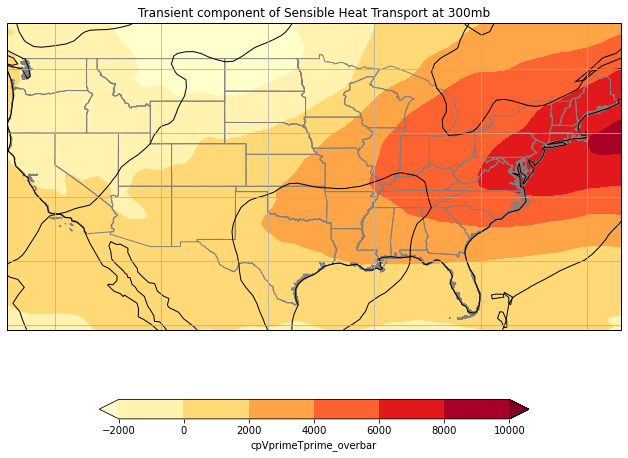

In [23]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=shclimo300_transients[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
#max_val=1600000
#increment=200000
#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(data['lon'], data['lat'], data,
            transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')
ax.contour(v300_climo['lon'],v300_climo['lat'],v300_climo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='cpVprimeTprime_overbar')

# Add title
plt.title('Transient component of Sensible Heat Transport at 300mb')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/shtransients300_conusclimo_merra.png')

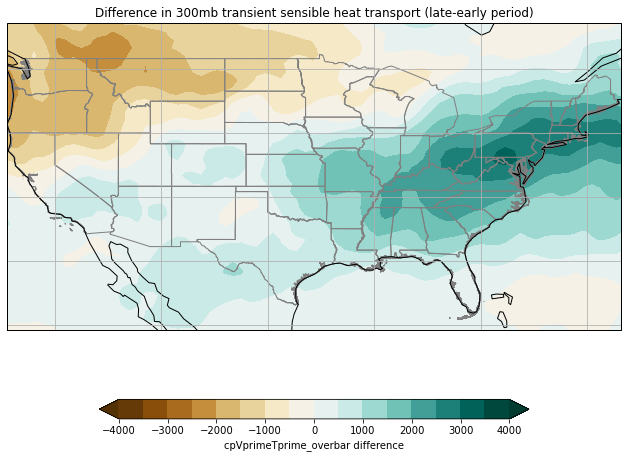

In [24]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=sh_diff_300[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
max_val=4000
increment=500
clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(sh_diff_300['lon'], sh_diff_300['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='cpVprimeTprime_overbar difference')

# Add title
plt.title('Difference in 300mb transient sensible heat transport (late-early period)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/shtransient300_conusclimo_merra_difference.png')

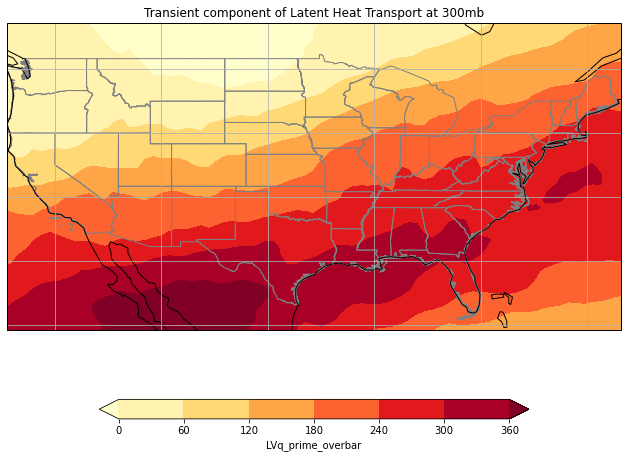

In [26]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=lh300_transient_climo[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
#max_val=1600000
#increment=200000
#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(data['lon'], data['lat'], data,
            transform = ccrs.PlateCarree(),cmap='YlOrRd',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='LVq_prime_overbar')

# Add title
plt.title('Transient component of Latent Heat Transport at 300mb')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/lhtransients300_conusclimo_merra.png')

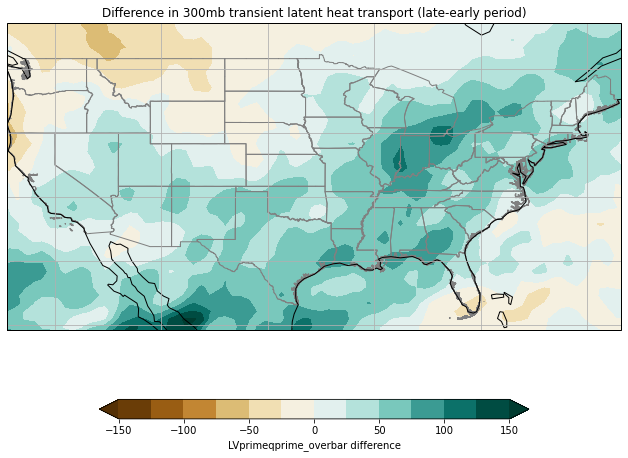

In [29]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Add cyclic point to data
data=lh300_transient_diff[:,:]
#data, lons = add_cyclic_point(data, coord=slp_filt['lon'])
max_val=150
increment=25
clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)
#clevs2=np.arange(-6,7,1)
# Make a filled contour plot
cs=ax.contourf(lh300_transient_diff['lon'], lh300_transient_diff['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')
#ax.contour(vclimo['lon'],vclimo['lat'],vclimo,clevs2,transform=ccrs.PlateCarree(),linewidths=1,colors='k')
#ax.quiver(vclimo['lon'], vclimo['lat'], vclimo[0,:].values,,minlength=0.1, scale_units='xy',scale=0.0001, transform=ccrs.PlateCarree(), color='k',width=0.002)
# Add coastlines
ax.coastlines()
ax.set_extent([-124.5,-66.8,23.486,49])

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='LVprimeqprime_overbar difference')

# Add title
plt.title('Difference in 300mb transient latent heat transport (late-early period)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/lhtransient300_conusclimo_merra_difference.png')

In [31]:
### Geopotential flux
f='/project/xprecip/merra2_ncfiles/geo_height/high_pass/hpfilter_geoheight_0.75deg.nc'
DS=xr.open_dataset(f)
#850mb
geoflux=DS['__xarray_dataarray_variable__']
geoflux

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lev: 2, lat: 47, lon: 100)>
[129099600 values with dtype=float64]
Coordinates:
    cutoffs       int64 ...
    coefficients  float64 ...
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
  * lev           (lev) float64 850.0 300.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [32]:
geoflux850=geoflux.sel(lev=850)
geoflux300=geoflux.sel(lev=300)
geoflux850

<xarray.DataArray '__xarray_dataarray_variable__' (time: 13734, lat: 47, lon: 100)>
[64549800 values with dtype=float64]
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 850.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5
  * time          (time) datetime64[ns] 1980-12-01 ... 2022-02-20T12:00:00

In [33]:
geofluxclimo_transients850=geoflux850.mean(dim='time')
geofluxclimo_transients850

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 0.02875732,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02735007,  0.02771824,  0.02715525, ..., -0.01024185,
        -0.01081728, -0.01179263],
       [ 0.02667547,  0.02713667,  0.02720876, ..., -0.00940603,
        -0.01025783, -0.0112219 ],
       ...,
       [ 0.02406887,  0.02321763,  0.01913121, ..., -0.08308256,
        -0.08721128, -0.09046278],
       [ 0.02568485,  0.02350769,  0.02117316, ..., -0.08673934,
        -0.08967819, -0.09155857],
       [ 0.02812198,  0.02529509,  0.02233717, ..., -0.08847123,
        -0.09045951, -0.0910827 ]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 850.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [34]:
geofluxclimo_transients850.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/geofluxtransients_climo850.nc')

In [36]:
geoflux_transients_early=geoflux850.sel(time=slice('1980-12-01','2001-02-20'))
#sh_total_early
geoflux_early_climo=geoflux_transients_early.mean(dim='time')
geoflux_early_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 0.04316806,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04072814,  0.04033336,  0.03876653, ..., -0.01414166,
        -0.0143281 , -0.01515536],
       [ 0.04002389,  0.04019415,  0.03996677, ..., -0.01382841,
        -0.01415984, -0.01493484],
       ...,
       [ 0.02184084,  0.02600879,  0.02580344, ..., -0.14590184,
        -0.15051406, -0.15394014],
       [ 0.03055136,  0.03037962,  0.03052186, ..., -0.12820429,
        -0.12971053, -0.13025516],
       [ 0.03775455,  0.03544054,  0.03332077, ..., -0.11135848,
        -0.11009187, -0.10782423]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 850.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [38]:
geoflux_transients_late=geoflux850.sel(time=slice('2001-12-01','2022-02-20'))
#sh_total_late
geoflux_late_climo=geoflux_transients_late.mean(dim='time')
geoflux_late_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 0.01434659,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01397199,  0.01510311,  0.01554398, ..., -0.00634204,
        -0.00730645, -0.0084299 ],
       [ 0.01332705,  0.01407918,  0.01445075, ..., -0.00498364,
        -0.00635582, -0.00750896],
       ...,
       [ 0.02629691,  0.02042647,  0.01245897, ..., -0.02026328,
        -0.02390849, -0.02698541],
       [ 0.02081834,  0.01663576,  0.01182446, ..., -0.04527438,
        -0.04964584, -0.05286199],
       [ 0.01848941,  0.01514964,  0.01135356, ..., -0.06558398,
        -0.07082715, -0.07434117]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 850.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [39]:
geodiff850_transients=geoflux_late_climo-geoflux_early_climo
geodiff850_transients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[-0.02882147,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02675615, -0.02523025, -0.02322255, ...,  0.00779962,
         0.00702164,  0.00672546],
       [-0.02669684, -0.02611497, -0.02551602, ...,  0.00884478,
         0.00780402,  0.00742588],
       ...,
       [ 0.00445607, -0.00558232, -0.01334447, ...,  0.12563856,
         0.12660556,  0.12695473],
       [-0.00973302, -0.01374387, -0.0186974 , ...,  0.08292991,
         0.0800647 ,  0.07739318],
       [-0.01926514, -0.0202909 , -0.02196721, ...,  0.0457745 ,
         0.03926472,  0.03348307]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 850.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [40]:
geodiff850_transients.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/geofluxtransients_diff850.nc')

In [41]:
geofluxclimo_transients300=geoflux300.mean(dim='time')
geofluxclimo_transients300

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 0.05643987,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05029207,  0.04765302,  0.04450879, ..., -0.03510628,
        -0.03290125, -0.03045141],
       [ 0.04156082,  0.03838695,  0.0359313 , ..., -0.04061815,
        -0.03790019, -0.03471201],
       ...,
       [-0.07304052, -0.08002039, -0.08712658, ..., -0.21565648,
        -0.21508827, -0.21285098],
       [-0.0703679 , -0.07880199, -0.08282875, ..., -0.21995973,
        -0.21733   , -0.21328805],
       [-0.06618172, -0.07263881, -0.07655549, ..., -0.22150726,
        -0.21783674, -0.21307062]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 300.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [42]:
geofluxclimo_transients300.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/geofluxtransients_climo300.nc')

In [43]:
geoflux_transients_early=geoflux300.sel(time=slice('1980-12-01','2001-02-20'))
#sh_total_early
geoflux_early_climo=geoflux_transients_early.mean(dim='time')
geoflux_early_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 0.10271712,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0956827 ,  0.09805023,  0.09821362, ..., -0.06184759,
        -0.06358142, -0.06419496],
       [ 0.08335816,  0.08510366,  0.08801244, ..., -0.07033431,
        -0.07151475, -0.07147447],
       ...,
       [-0.08622151, -0.0888452 , -0.09339319, ..., -0.14501196,
        -0.13168898, -0.11644285],
       [-0.07782598, -0.08394144, -0.08667271, ..., -0.13913239,
        -0.12575994, -0.1116145 ],
       [-0.06870686, -0.07405346, -0.07661733, ..., -0.1353674 ,
        -0.12282573, -0.10862929]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 300.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [44]:
geoflux_transients_late=geoflux300.sel(time=slice('2001-12-01','2022-02-20'))
#sh_total_late
geoflux_late_climo=geoflux_transients_late.mean(dim='time')
geoflux_late_climo

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[ 1.01626210e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.90143713e-03, -2.74419366e-03, -9.19604451e-03, ...,
        -8.36496698e-03, -2.22108424e-03,  3.29212995e-03],
       [-2.36518209e-04, -8.32974865e-03, -1.61498382e-02, ...,
        -1.09019827e-02, -4.28561790e-03,  2.05043601e-03],
       ...,
       [-5.98595324e-02, -7.11955772e-02, -8.08599747e-02, ...,
        -2.86301006e-01, -2.98487557e-01, -3.09259111e-01],
       [-6.29098182e-02, -7.36625342e-02, -7.89847859e-02, ...,
        -3.00787073e-01, -3.08900052e-01, -3.14961601e-01],
       [-6.36565798e-02, -7.12241677e-02, -7.64936511e-02, ...,
        -3.07647113e-01, -3.12847749e-01, -3.17511957e-01]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 300.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [45]:
geodiff300_transients=geoflux_late_climo-geoflux_early_climo
geodiff300_transients

<xarray.DataArray '__xarray_dataarray_variable__' (lat: 47, lon: 100)>
array([[-9.25544989e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.07812613e-02, -1.00794426e-01, -1.07409662e-01, ...,
         5.34826181e-02,  6.13603363e-02,  6.74870895e-02],
       [-8.35946745e-02, -9.34334065e-02, -1.04162276e-01, ...,
         5.94323267e-02,  6.72291358e-02,  7.35249016e-02],
       ...,
       [ 2.63619727e-02,  1.76496241e-02,  1.25332104e-02, ...,
        -1.41289044e-01, -1.66798579e-01, -1.92816265e-01],
       [ 1.49161615e-02,  1.02789036e-02,  7.68792322e-03, ...,
        -1.61654681e-01, -1.83140112e-01, -2.03347100e-01],
       [ 5.05028404e-03,  2.82929259e-03,  1.23678464e-04, ...,
        -1.72279716e-01, -1.90022015e-01, -2.08882671e-01]])
Coordinates:
    cutoffs       int64 10
    coefficients  float64 -15.0
  * lon           (lon) float64 -125.0 -124.2 -123.5 ... -52.25 -51.5 -50.75
    lev           float64 300.0
  * lat           (lat) float64 20.0 20.75 21.5 22.25 ... 52.25 53.0 53.75 54.5

In [46]:
geodiff300_transients.to_netcdf('/project/xprecip/merra2_ncfiles/energy_calcs/geofluxtransients_diff300.nc')